### Line detection using Houghline method

The Hough Transform is a method that is used in image processing to detect any shape, if that shape can be represented in mathematical form. It can detect the shape even if it is broken or distorted a little bit.

We will see how Hough transform works for line detection using the HoughLine transform method. To apply the Houghline method, first an edge detection of the specific image is desirable.

<b>Basics of Houghline Method:</b>

A line can be represented as y = mx + c or in parametric form, as r = xcos? + ysin? where r is the perpendicular distance from origin to the line, and ? is the angle formed by this perpendicular line and horizontal axis measured in counter-clockwise ( That direction varies on how you represent the coordinate system. This representation is used in OpenCV).

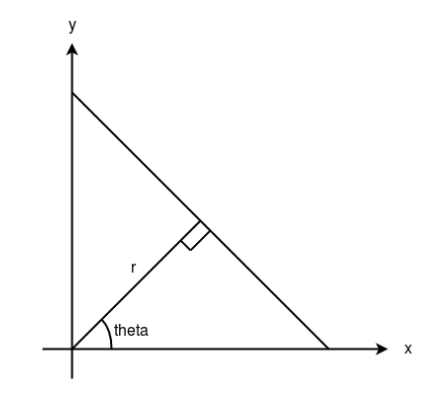

<b>Working of Houghline method:</b>

 - First it creates a 2D array or accumulator (to hold values of two parameters) and it is set to zero initially.
 - Let rows denote the r and columns denote the (θ)theta.
 - Size of array depends on the accuracy you need. Suppose you want the accuracy of angles to be 1 degree, you need 180 columns(Maximum degree for a straight line is 180).
 - For r, the maximum distance possible is the diagonal length of the image. So taking one pixel accuracy, number of rows can be diagonal length of the image.

<b>Example:</b>

Consider a 100×100 image with a horizontal line at the middle. Take the first point of the line. You know its (x,y) values. Now in the line equation, put the values θ = 0,1,2,….,180 and check the r you get. For every (r, θ) pair, you increment value by one in the accumulator in its corresponding (r, θ) cells. So now in accumulator, the cell (50,90) = 1 along with some other cells.

Now take the second point on the line. Do the same as above. Increment the values in the cells corresponding to (r, θ) you got. This time, the cell (50,90) = 2. We are actually voting the (r, θ) values. You continue this process for every point on the line. At each point, the cell (50,90) will be incremented or voted up, while other cells may or may not be voted up. This way, at the end, the cell (50,90) will have maximum votes. So if you search the accumulator for maximum votes, you get the value (50,90) which says, there is a line in this image at distance 50 from origin and at angle 90 degrees.

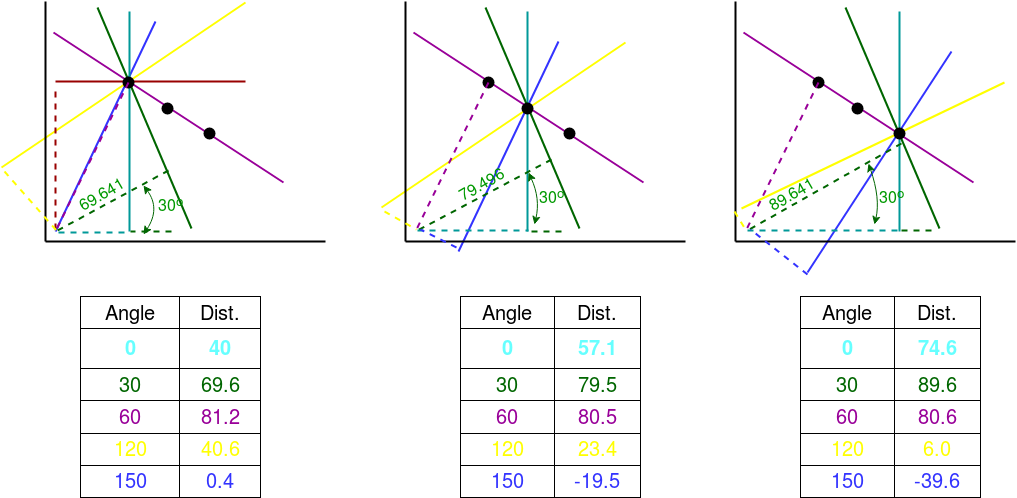

Everything explained above is encapsulated in the OpenCV function, cv2.HoughLines(). It simply returns an array of (r, 0) values. r is measured in pixels and θ is measured in radians.

### Circle Detection

Circle detection finds a variety of uses in biomedical applications, ranging from iris detection to white blood cell segmentation. The technique followed is similar to the one used to detect lines.

<b>Basics of Circle Detection:</b> 

A circle can be described by the following equation:

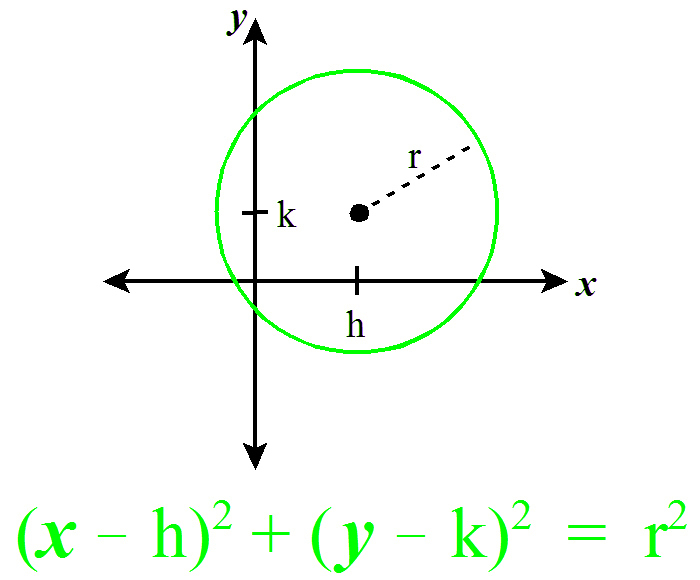

To detect circles, we may fix a point (x, y). Now, we are required to find 3 parameters: a, b and r. Therefore, the problem is in a 3-dimensional search space. To find possible circles, the algorithm uses a 3-D matrix called the “Accumulator Matrix” to store potential a, b and r values. The value of a (x-coordinate of the center) may range from 1 to rows, b (y-coordinate of the center) may range from 1 to cols, and r may range from 1 to maxRadius = SQRT(rows<sup>2</sup> + cols<sup>2</sup>)

Below are the steps of the algorithm.

 - <b>Initializing the Accumulator Matrix:</b> Initialize a matrix of dimensions rows * cols * maxRadius with zeros.
 - <b>Pre-processing the image:</b> Apply blurring, grayscale and an edge detector on the image. This is done to ensure the circles show as darkened image edges.
 - <b>Looping through the points:</b> Pick a pointx_ion the image.
 - <b>Fixing r and looping through a and b:</b> Use a double nested loop to find a value of r, varying a and b in the given ranges.

<pre>for a in range(rows): 
	for b in range(cols):
		r = math.sqrt((xi - a)**2 + (yi - b)**2) 
		accum_matrix[a][b][r] += 1
</pre>
 - <b>Voting:</b> Pick the points in the accumulator matrix with the maximum value. These are strong points which indicate the existence of a circle with a, b and r parameters. This gives us the Hough space of circles.
 - <b>Finding Circles:</b> Finally, using the above circles as candidate circles, vote according to the image. The maximum voted circle in the accumulator matrix gives us the circle.

The HoughCircles function in OpenCV has the following parameters which can be altered according to the image.

 - <b>Detection Method:</b> OpenCV has an advanced implementation, HOUGH_GRADIENT, which uses gradient of the edges instead of filling up the entire 3D accumulator matrix, thereby speeding up the process. 
 - <b>dp:</b> This is the ratio of the resolution of original image to the accumulator matrix. 
 - <b>minDist:</b> This parameter controls the minimum distance between detected circles. 
 - <b>Param1:</b> Canny edge detection requires two parameters — minVal and maxVal. Param1 is the higher threshold of the two. The second one is set as Param1/2. 
 - <b>Param2:</b> This is the accumulator threshold for the candidate detected circles. By increasing this threshold value, we can ensure that only the best circles, corresponding to larger accumulator values, are returned. 
 - <b>minRadius:</b> Minimum circle radius. 
 - <b>maxRadius:</b> Maximum circle radius.


### Corner Detection

What is a Corner? A corner can be interpreted as the junction of two edges (where an edge is a sudden change in image brightness).

#### Shi-Tomasi Corner Detection Method

Shi-Tomasi Corner Detection was published by J.Shi and C.Tomasi in their paper ‘Good Features to Track‘. Here the basic intuition is that corners can be detected by looking for significant change in all direction. We consider a small window on the image then scan the whole image, looking for corners. Shifting this small window in any direction would result in a large change in appearance, if that particular window happens to be located on a corner.

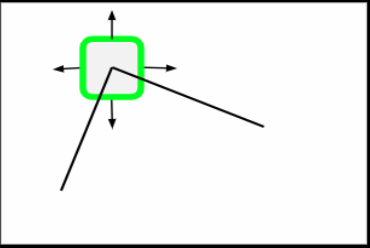

Flat regions will have no change in any direction.

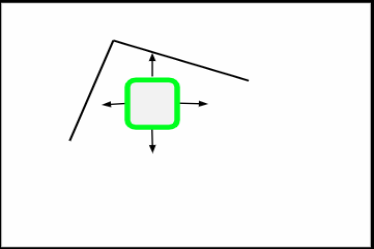

If there’s an edge, then there will be no major change along the edge direction.

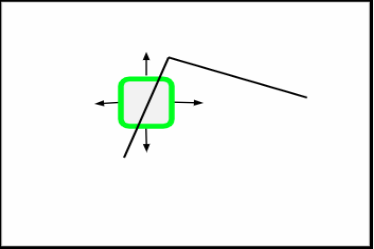

<b>Mathematical Overview:</b>

For a window(W) located at (X, Y) with pixel intensity I(X, Y), formula for Shi-Tomasi Corner Detection is:

f(X, Y) = Σ (I(Xk, Yk) - I(Xk + ΔX, Yk + ΔY))2  where (Xk, Yk) ϵ W

According to the formula: If we’re scanning the image with a window just as we would with a kernel and we notice that there is an area where there’s a major change no matter in what direction we actually scan, then we have a good intuition that there’s probably a corner there.

Calculation of f(X, Y) will be really slow. Hence, we use Taylor expansion to simplify the scoring function, R.

R = min(λ1, λ2)

where λ1, λ2 are eigenvalues of resultant matrix

<b>Using goodFeaturesToTrack() function:</b>

<b>Syntax:</b> cv2.goodFeaturesToTrack(gray_img, maxc, Q, minD) 

<b>Parameters:</b>

 - gray_img – Grayscale image with integral values 
 - maxc – Maximum number of corners we want(give negative value to get all the corners) 
 - Q – Quality level parameter(preferred value=0.01) 
 - minD – Minimum possible Euclidean distance between the returned corners.